# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
# Import the libraries you'll need here.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
import numpy as np

import scipy.stats as stats

# Load the csv file into a pandas dataframe.


In [2]:
# Load the csv file into a pandas dataframe.

df = pd.read_csv("data/cars.csv")


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
df.shape

(11914, 15)

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.
df.duplicated().sum()


720

In [5]:
#  2. Modify our df to have all duplicate rows removed. 

df = df.drop_duplicates()


In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?

sum_series = df.isna().sum() # created a series to store the sum of # of null values in each column

max_null = sum_series.max() # find the max value in the above series

sum_series[sum_series == max_null] # see what key has the value = max (the value we found above)

Engine HP    69
dtype: int64

In [8]:
# * Print how long (aka how many rows) our dataframe is.
len(df)

11194

In [9]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
len(df)

11092

### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

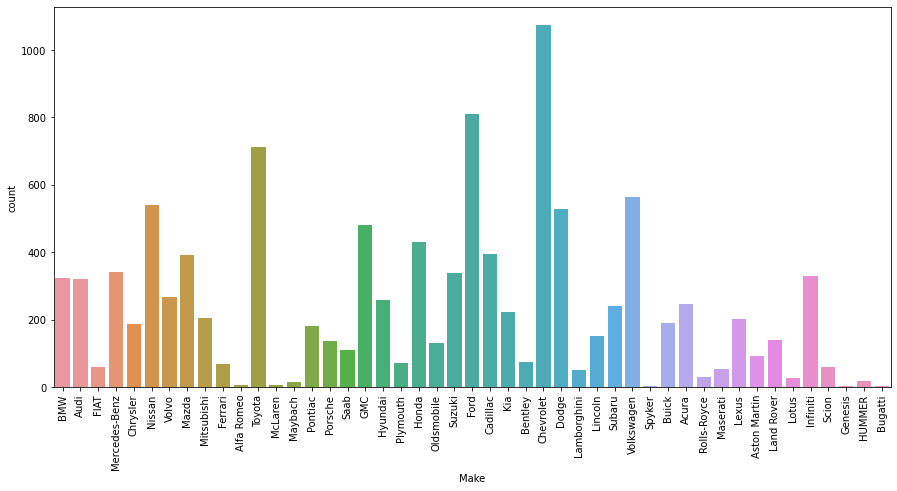

In [23]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(ax = ax, data = df., x = "Make")
plt.xticks(rotation = 90);


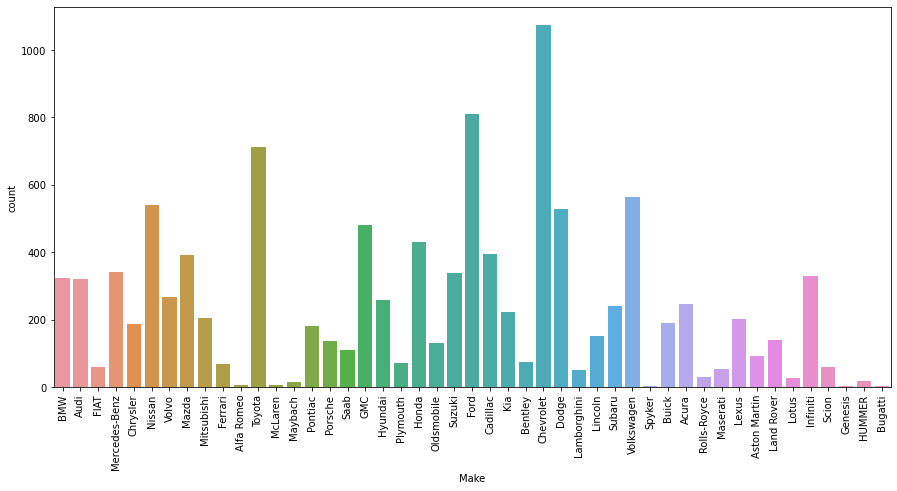

In [11]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(ax = ax, data = df, x = "Make")
plt.xticks(rotation = 90);


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

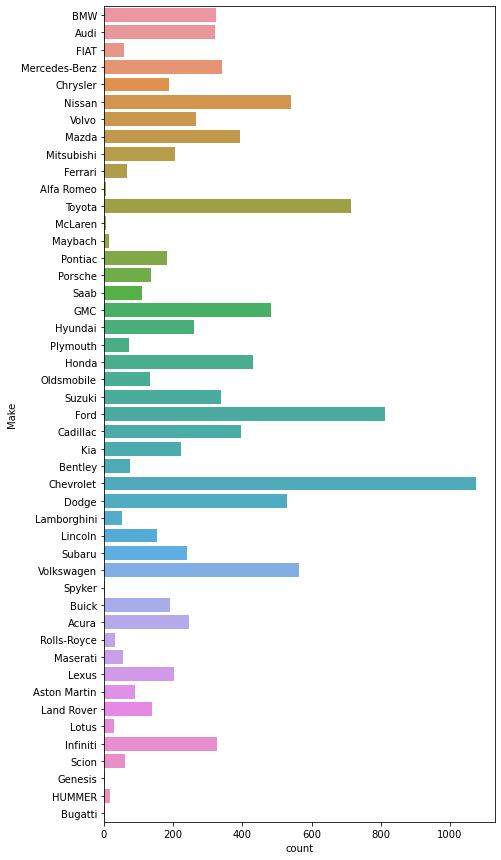

In [12]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
fig, ax = plt.subplots(figsize=(7,15))
sns.countplot(ax = ax, data = df, y = "Make",orient = "h" );

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


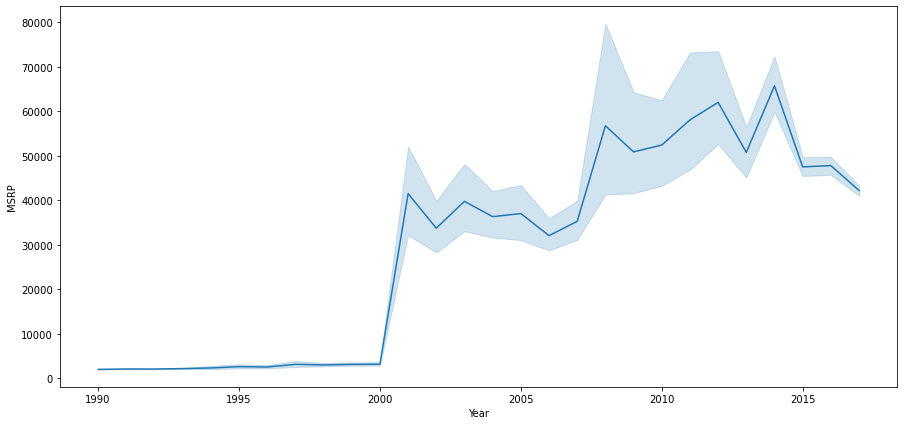

In [13]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data = df, x = 'Year', y = 'MSRP')



# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [14]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

condition = df["Year"] <=2000
if_true = df["MSRP"]* 10
if_false =  df["MSRP"] 

df["adjusted_price"] = np.where(condition, if_true, if_false)


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

[(0.0, 100000.0)]

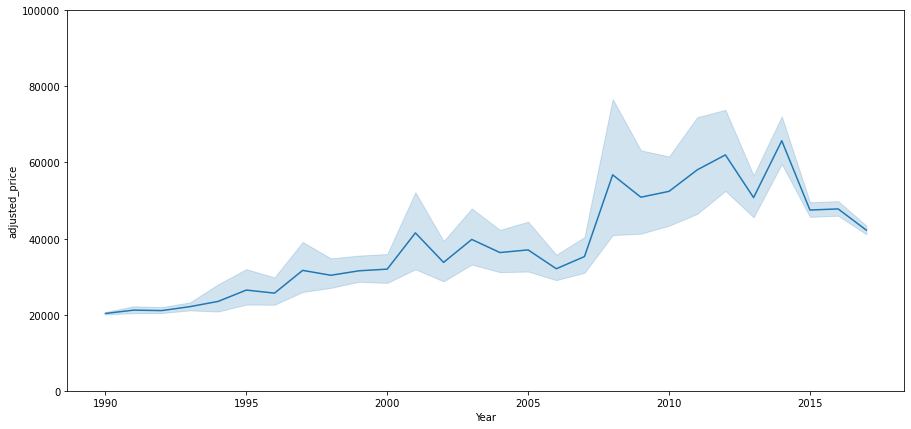

In [15]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

fig, ax = plt.subplots(figsize=(15,7))

lplot = sns.lineplot(data = df, x = 'Year', y = 'adjusted_price')
lplot.set(ylim = (0,100000))



# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [16]:
# What are the top 5 car makers make the most expensive cars on average. 

price_mean = df.groupby("Make")["MSRP"].mean() # groupby make and calculate the average
pm_rounded = price_mean.round(2) # round to 2 decimal points
pmr_sorted = pm_rounded.sort_values(ascending = False) # sort in descending order
pmr_sorted[0:5] # display the top 5 values


Make
Bugatti        1757223.67
Maybach         546221.88
Rolls-Royce     351130.65
Lamborghini     331567.31
Bentley         247169.32
Name: MSRP, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [25]:
# Which car makers have the highest median highway MPG?
df.head()

mpg_median =df.groupby("Make")["highway MPG"].median()
mpg_median.sort_values(ascending = False)[0:5]

Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

C:\Users\Tashi Nyangmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


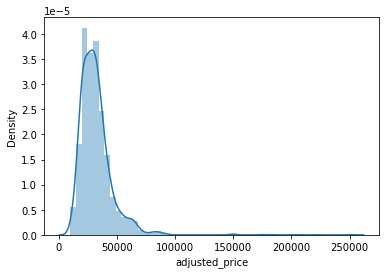

In [18]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

make_list = ['Chevrolet', 'Ford', 'Toyota']

condition = df["Make"].isin(make_list)
df1 = df[condition].copy()

sns.distplot(df1["adjusted_price"])


# Remake the same histogram, but limit the x-axis from 0 to 100,000

C:\Users\Tashi Nyangmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


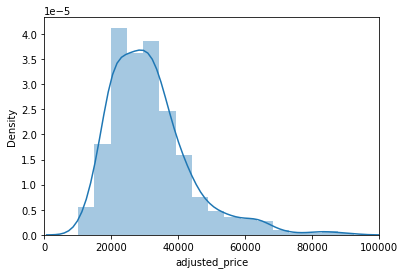

In [19]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

g = sns.distplot(df1["adjusted_price"])
g.set(xlim = (0, 100000));

# Plot the relationship between Engine HP and highway MPG

C:\Users\Tashi Nyangmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


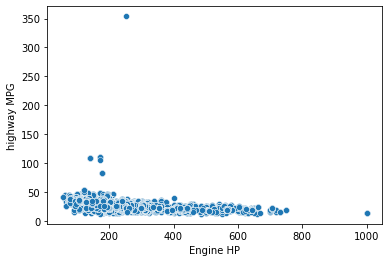

In [20]:
# Plot the relationship between Engine HP and highway MPG

sns.scatterplot("Engine HP", "highway MPG", data = df)


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

C:\Users\Tashi Nyangmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


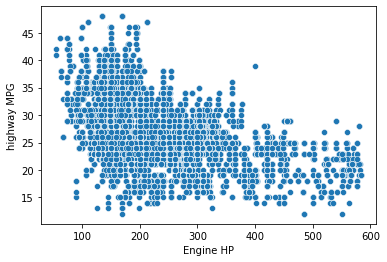

In [21]:
# Remove any statisical outliers from Engine HP and highway MPG

# Creating 2 new columns for z-scores for each "Engine HP" and "highway MPG"
df["Engine HP_zscore"] = abs(stats.zscore(df["Engine HP"]))
df["Highway MPG_zscore"] = abs(stats.zscore(df["highway MPG"]))

# Creating condition masks
condition1 = df["Engine HP_zscore"] > 3
condition2 = df["Highway MPG_zscore"] > 3

# Creating a copy of our DataFrame
df_copy = df.copy()

# Filtering out observations (rows) 
df_copy = df_copy[(~condition1) & (~condition2)]

# Scatterplot
sns.scatterplot("Engine HP", "highway MPG", data = df_copy)

# What does this plot tell you about how Engine HP affects highway MPG?

In [22]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('It seems like there is a weak to medium negative correlation')

It seems like there is a weak to medium negative correlation


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

In [124]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)


In [ ]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print('1) Engine HP & Highway MPG vs their respective z-scores')
print('2) City MPG vs Highway MPG')


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

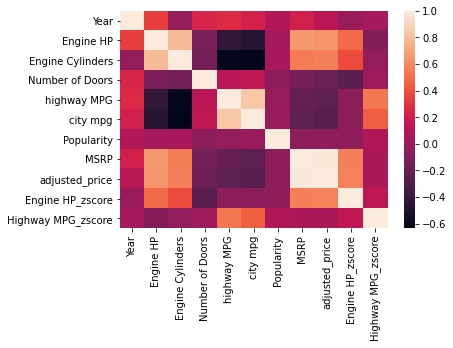

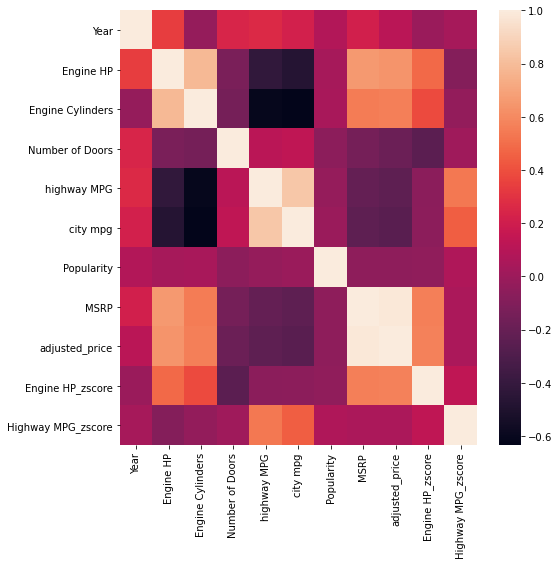

In [129]:
# * Make a heatmap plot of all of the correlations in our dataset.
sns.heatmap(df.corr())

# * Change the figure size of our heatmap plot to be 8x8
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), ax = ax)


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [159]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

new_columns_names= list() # declare an emplty list to store new columns names

for i in range(len(df.columns)):
    replaced_name = df.columns[i].replace(" ", "_") # replaced the spaces with no spaces
    new_columns_names.append(replaced_name) # appending "new name of each column" to the list one at a time
    
df.columns = new_columns_names  # assigning DataFrame:df's column names, the newly created list of strings/column names

list

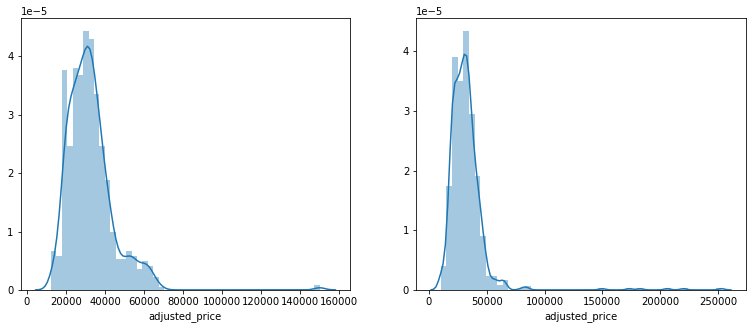

In [172]:
f, axes = plt.subplots(1, 2, figsize=(13,5))

sns.distplot(df[df["Make"]== "Ford"]["adjusted_price"], ax = axes[0])
sns.distplot(df[df["Make"]== "Toyota"]["adjusted_price"], ax = axes[1])